100%|█████████████████████████████████████| 10001/10001 [12:55<00:00, 12.89it/s]


Elapsed time: 00:12:55


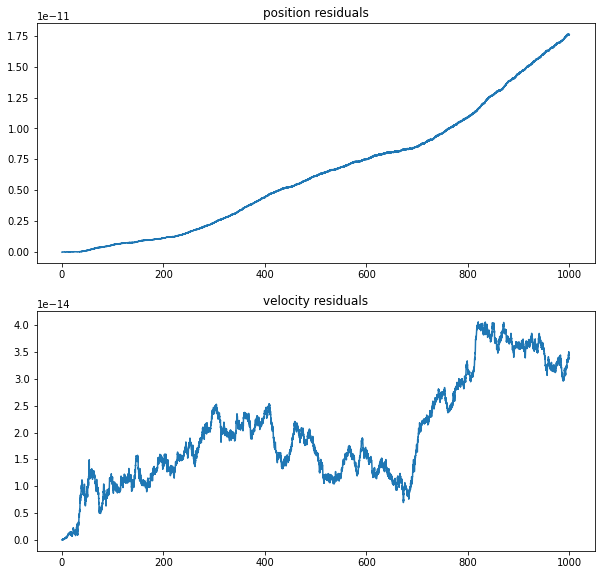

In [2]:
from experiments import Experiment

import time
import matplotlib.pyplot as plt

experiment = Experiment()
pos_res, vel_res, ts, elap_time = experiment.run(100, 1000, 10000)
print('Elapsed time:', time.strftime('%H:%M:%S', time.gmtime(elap_time)))

f = plt.figure(figsize=(10,15))

ax1 = f.add_subplot(311)
ax1.set_title('position residuals')
ax1.plot(ts, pos_res)

ax2 = f.add_subplot(312, sharex=ax1)
ax2.set_title('velocity residuals')
ax2.plot(ts, vel_res)

plt.show()